In [20]:
# Team member: 
#             Jufeng Yang, ID: 20125011
#             Xingda Zhou, ID: 19107471
#             Zhongen Qin, ID: 19107579

# Import basic libaries: 
# numpy used to pre-process the data and computr the matrix.
# pandas use to import the Train_Test TXT files.
# matplotlib used to plot the figure that shows the result.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# The following block code is useless for the project.
# This code just use to load datasets, But it is hard-path style.
# So I change it in the second block

# Open and read the Training and Test TXT file.
Train_data = pd.read_csv(open('C:/Users/Administrator/Desktop/adaboost-train-21.txt','r', encoding='utf-8'),sep='\s+',header=None)
Test_data = pd.read_csv(open('C:/Users/Administrator/Desktop/adaboost-test-21.txt','r', encoding='utf-8'),sep='\s+',header=None)


# Pre-process the datasets
# Separate the features and lebel from TXT files. The 1st, 2nd colums is feature, 3rd colum is lebel

# Feature separation in Test and Training file .
# Convert the datasets in a List(Array) form.
Train_feature = Train_data.iloc[:,0:2]
Train_feature = np.array(Train_feature)
Test_feature = Test_data.iloc[:,0:2]
Test_feature = np.array(Test_feature)

# label separarion and store the labels in 1-D array.
Train_label = Train_data.iloc[:,2:3]
Train_label = np.array(Train_label)
Train_label = Train_label.reshape(-1)
Test_label = Test_data.iloc[:,2:3]
Test_label = np.array(Test_label)
Test_label = Test_label.reshape(-1)

# Test the first ten datas in the file.
# Check the form of data if is correct.
print(Train_feature.shape)
print(Train_feature[0:10])
print(Train_label.shape)
print(Train_label[0:10])

(400, 2)
[[-0.168004  1.338776]
 [-0.158786  0.395977]
 [-1.417589  1.673393]
 [-0.125686  0.183042]
 [-0.547854  2.105204]
 [-0.229456  0.522614]
 [ 1.175307 -0.874917]
 [ 0.168572  0.660164]
 [ 0.831001  1.852393]
 [-0.16927   0.274621]]
(400,)
[ 1 -1  1 -1  1 -1  1 -1  1 -1]


In [22]:
def loadDataSet(fileName):
   #The length of each line
    numberFeat = len(open(fileName).readline().split())-1
    dataSet = []; labelSet = []; dataPosi = []; dataMinus = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        #split esch line
        curLine = line.strip().split()
        # Save data and label of each line
        # Separate the labels and datasets
        for i in range(numberFeat):
            lineArr.append(float(curLine[i]))
        dataSet.append(lineArr)
        labelSet.append(float(curLine[-1]))
    # Convert list to a numpy array
    dataSet = np.array(dataSet)
    labelSet = np.array(labelSet) 
    #return dataSet, labelSet
    return dataSet, labelSet

In [23]:
# Weak learner（Descision stump） introduction.

# construct a weak learner or say Decision stump。
class DecisionStump:
    def __init__(self):
        # The Minimum error
        self.best_err = 1
        # The best classification feature number
        self.best_fea_id = 0
        # The best threshold
        self.best_thres = 0
        # the sign of threshold, which means, 1 is > threshod, 0 is < threshold.
        self.best_op = 1
 
    
    # Define a Training method,
    def fit(self, X, y, sample_weight=None):
        # Initial the weight as 1/n. n is the number of features.
        if sample_weight is None:
            sample_weight = np.ones(len(X)) / len(X)
        # Shape of the features, In this file, we have 2 features.
        n = X.shape[1]
        # Loop for each feature, and find the best feature to classfy.
        for i in range(n):
            feature = X[:, i]
            # Sort the feature value from small to bigger.
            fea_unique = np.sort(np.unique(feature))
            # Loop for computing the error in each medpoint(threshold).  
            for j in range(len(fea_unique)-1):
                # Setting all possible threshold
                thres = (fea_unique[j] + fea_unique[j+1]) / 2 
                for op in (0, 1):
                    # Find the better sign: > or <.
                    y_ = 2*(feature >= thres)-1 if op==1 else 2*(feature < thres)-1 
                    err = np.sum((y_ != y)*sample_weight)
                    # Store all parameters when the error is minimum.
                    if err < self.best_err: 
                        self.best_err = err
                        self.best_op = op
                        self.best_fea_id = i
                        self.best_thres = thres
        return self
    
    # Use the parameter after training to predicte the test points.
    # Read the best feature number to predict the test datas.
    def predict(self, X):
        feature = X[:, self.best_fea_id]
        # Reture the predict result in the range[-1,1]
        return 2*(feature >= self.best_thres)-1 if self.best_op == 1 else 2*(feature < self.best_thres)-1
    
    # Use the predict value to calculate accuracy.
    def accuracy(self, X, y, sample_weight=None):
        y_pre = self.predict(X)
        if sample_weight is not None:
            return np.sum((y_pre == y)*sample_weight)
        return np.mean(y_pre == y)

In [24]:
# Define a plot merhod. It is used to plot the original data point and weak learner classifier bound.
def showDataSet(featureMat, labelMat,thresholdMat, fea_idMat):
    # Define to array use to store the positive and negative points separately.
    data_plus = []                              
    data_minus = []                             
    
    # Loop for travel throughout all labels 
    # If label is positive, store it into positive array.
    for i in range(len(featureMat)):
        if labelMat[i] > 0:
            data_plus.append(featureMat[i])
        else:
            data_minus.append(featureMat[i])
            
    # Loop for plot the boundary lines
    # feature 1 represent the horizon line. feature 2 represent vertical line.
    for j in range(len(fea_idMat)):
        if fea_idMat[j] > 0:
            plt.axhline(thresholdMat[j])
        else:
            Bound_line = plt.axvline(thresholdMat[j])
    
    # Convert the array into a numpy array, which use to plot scatter. 
    data_plus_np = np.array(data_plus)          
    data_minus_np = np.array(data_minus)        
    
    # Plot the positive and negative points
    Posi_points = plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])
    Naga_Points = plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1])
    plt.legend((Posi_points,Naga_Points,Bound_line),('+1','-1','Boundary'), loc = 'upper right' )
    plt.show()
       

In [25]:
#Integrated learning adaboost classifier

class AdaBoostClassifier_By_Jufeng:
    def __init__(self, n_estimators=13):
        # Define the number of weak learner.
        # n_estimators use to store the number of weak learner
        # estimators use to store the parameters preduced by Weak_learner
        # alphas use to store the coefficient of weight.
        # feature_id and threshold use to store the all optimal feature number and threshold
        # use it to plot the graph.
        self.n_estimators = n_estimators
        self.estimators = []
        self.alphas = []
        self.feature_id = []
        self.threshold = []


    def fit(self, X, y):
        # Initial sample weight to 1/n
        sample_weight = np.ones(len(X)) / len(X)
        # Train each weak learners.
        for _ in range(self.n_estimators):
            dtc = DecisionStump().fit(X, y, sample_weight)
            # The coefficient of the weight
            alpha = 1/2 * np.log((1-dtc.best_err)/dtc.best_err)
            # Use the weak learner to predict the test data.
            y_pred = dtc.predict(X)
            # Updata the iteration sample weight 
            sample_weight *= np.exp(-alpha*y_pred*y)
            # Normalize the weight.
            sample_weight /= np.sum(sample_weight)
            # Store the relative parameters into the estimators.
            self.estimators.append(dtc)
            # Store the coefficient of weight into the alpha variable.
            self.alphas.append(alpha)
            # Store the all optimal feature id and thresholds
            self.feature_id.append(dtc.best_fea_id)
            self.threshold.append(dtc.best_thres)
            
        return self
     
    # Prediction
    def predict(self, X):
        y_pred = np.empty((len(X), self.n_estimators)) 
        for i in range(self.n_estimators):
            # Predict result stored in the 2-D array, each colum represent a predict result.
            y_pred[:, i] = self.estimators[i].predict(X)
        # Multiply the prediction result with the training weights as the integrated prediction result
        y_pred = y_pred * np.array(self.alphas) 
        # Judged and mapped to -1 and 1 with 0 as the threshold
        return 2*(np.sum(y_pred, axis=1)>0)-1  
    # Compare the predict value with ture value.
    # Calculate the accuracy.
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred==y)

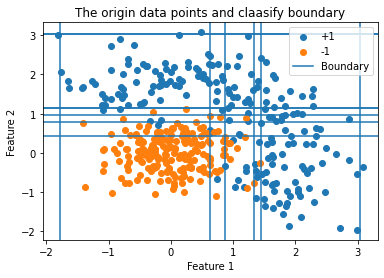

In [26]:
# Plot the datapoints and boundary
# Delivery the threshold values and feature id array to thresholdMat and pass it to a plot method
thresholdMat = AdaBoostClassifier_By_Jufeng().fit(Train_feature, Train_label).threshold
fea_idMat = AdaBoostClassifier_By_Jufeng().fit(Train_feature, Train_label).feature_id
# Call the plot method.
plt.title('The origin data points and claasify boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
showDataSet(Train_feature, Train_label,thresholdMat,fea_idMat)

1 weak learners, the accuracy is :  0.5
2 weak learners, the accuracy is :  0.7975
3 weak learners, the accuracy is :  0.765
4 weak learners, the accuracy is :  0.7975
5 weak learners, the accuracy is :  0.9275
6 weak learners, the accuracy is :  0.9475
7 weak learners, the accuracy is :  0.9525
8 weak learners, the accuracy is :  0.9525
9 weak learners, the accuracy is :  0.955
10 weak learners, the accuracy is :  0.9525
11 weak learners, the accuracy is :  0.955
12 weak learners, the accuracy is :  0.955
13 weak learners, the accuracy is :  0.955
14 weak learners, the accuracy is :  0.955
15 weak learners, the accuracy is :  0.955
16 weak learners, the accuracy is :  0.955
17 weak learners, the accuracy is :  0.9575
18 weak learners, the accuracy is :  0.955
19 weak learners, the accuracy is :  0.9575
20 weak learners, the accuracy is :  0.965
21 weak learners, the accuracy is :  0.9575
22 weak learners, the accuracy is :  0.9675
23 weak learners, the accuracy is :  0.9575
24 weak le

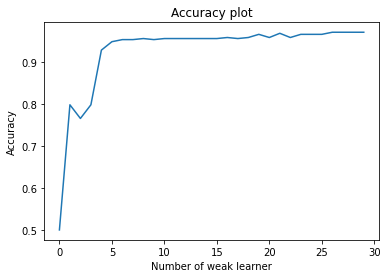

In [28]:
# plot the accuracy line.

# Define two array to store all numers of accuracy and index(weak learner number)
x = []
Accuracy = []

# Load Datasets
Train_feature, Train_label = loadDataSet('adaboost-train-21.txt')
Test_feature, Test_label = loadDataSet('adaboost-test-21.txt')
# Loop for produce the index and accuracys
# Print all accuracy
for n in range(30):
    x.append(n)
    Accuracy.append(AdaBoostClassifier_By_Jufeng(n).fit(Train_feature, Train_label).accuracy(Train_feature, Train_label))
    print('%d weak learners, the accuracy is : '%(n+1), Accuracy[n])

# Plot the accuracy trend line
plt.title('Accuracy plot')
plt.xlabel('Number of weak learner')
plt.ylabel('Accuracy')
plt.plot(x, Accuracy)
plt.show()